In [5]:
import numpy as np
import pandas as pd
import time
start=time.time()

In [6]:
df=pd.read_csv("docword.kos.txt",skiprows=3,sep=' ',header=None)

In [7]:
df

,0,1,2
0,1,61,2
1,1,76,1
2,1,89,1
3,1,211,1
4,1,296,1
...,...,...,...
353155,3430,6328,1
353156,3430,6644,1
353157,3430,6741,1
353158,3430,6799,1


In [8]:
doclen = len(df[0].unique())

In [9]:
worlen = len(df[1].unique())

In [10]:
len(df[1].unique())


6906

In [11]:
df.groupby([0]).count()

,1,2
0,,
1,104,104
2,56,56
3,130,130
4,91,91
5,137,137
...,...,...
3426,43,43
3427,23,23
3428,69,69


In [12]:
m=np.zeros((worlen +1 ,doclen + 1))
for j in range(len(df[1])):
    m[int(df[1][j]),int(df[0][j])]=1
sparse_matrix=pd.DataFrame(m)
sparse_matrix=sparse_matrix.iloc[1:,1:]
sparse_matrix

,1,2,3,4,5,6,7,8,9,10,...,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6905,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.metrics import pairwise_distances
num=sparse_matrix.to_numpy()
num=np.transpose(num)
jaccard=1-pairwise_distances(num, metric='jaccard')

C:\Users\AMAN-PC\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [14]:
pd.DataFrame(jaccard)

,0,1,2,3,4,5,6,7,8,9,...,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429
0,1.000000,0.066667,0.035398,0.042781,0.080717,0.039062,0.061350,0.037037,0.222222,0.029851,...,0.038043,0.045455,0.043478,0.028369,0.046667,0.072993,0.076271,0.042169,0.019108,0.029586
1,0.066667,1.000000,0.062857,0.027972,0.048913,0.049383,0.068376,0.033708,0.054054,0.084337,...,0.051471,0.031674,0.073171,0.077778,0.058252,0.064516,0.067568,0.033058,0.027523,0.024390
2,0.035398,0.062857,1.000000,0.032710,0.051181,0.039216,0.047368,0.050633,0.043716,0.025000,...,0.038278,0.696629,0.043210,0.036364,0.033898,0.054878,0.033784,0.031088,0.033333,0.025641
3,0.042781,0.027972,0.032710,1.000000,0.157360,0.016949,0.032258,0.024194,0.013333,0.024590,...,0.034884,0.035433,0.023973,0.031250,0.028571,0.030769,0.017857,0.032258,0.027972,0.032051
4,0.080717,0.048913,0.051181,0.157360,1.000000,0.031056,0.072917,0.061350,0.076087,0.023952,...,0.041860,0.065517,0.061538,0.022989,0.049724,0.052632,0.052632,0.051020,0.043243,0.056122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0.072993,0.064516,0.054878,0.030769,0.052632,0.090909,0.098039,0.097222,0.130435,0.040541,...,0.023622,0.053922,0.032922,0.090909,0.142857,1.000000,0.346939,0.066667,0.076087,0.066038
3426,0.076271,0.067568,0.033784,0.017857,0.052632,0.106383,0.108434,0.092593,0.105263,0.036364,...,0.028037,0.031746,0.031250,0.066667,0.101449,0.346939,1.000000,0.121951,0.053333,0.056818
3427,0.042169,0.033058,0.031088,0.032258,0.051020,0.031579,0.045455,0.029412,0.031746,0.009804,...,0.026316,0.029915,0.037453,0.047619,0.060870,0.066667,0.121951,1.000000,0.262626,0.029630
3428,0.019108,0.027523,0.033333,0.027972,0.043243,0.062500,0.024590,0.045455,0.035398,0.022727,...,0.036232,0.036364,0.023256,0.043011,0.048077,0.076087,0.053333,0.262626,1.000000,0.285714


In [15]:
from sklearn.cluster import KMeans
l=[]
for i in range(1,15):
    model=KMeans(n_clusters=i,init='k-means++',max_iter=50,n_init=10)
    model.fit(jaccard)
    l.append(model.inertia_)

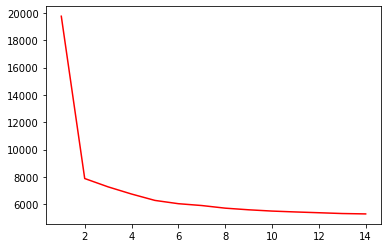

In [16]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,15)),l, c='r')


In [17]:
end=time.time()
end-start

235.0170578956604

C:\Users\AMAN-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


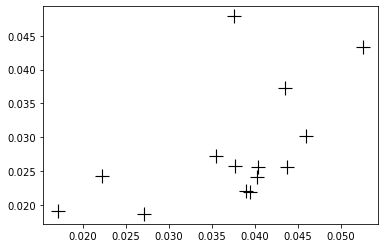

In [18]:
import seaborn as sns
sns.scatterplot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 
                marker='+', 
                color='black', 
                s=200);

C:\Users\AMAN-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


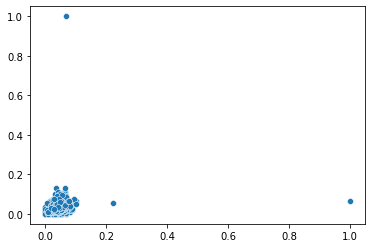

In [19]:
sns.scatterplot(jaccard[:,0], jaccard[:,1],  
                palette=sns.color_palette("Set1", n_colors=3));

In [20]:
k_means = KMeans(n_clusters=2,init='k-means++',max_iter=50,n_init=10)
k_means.fit(jaccard)


KMeans(max_iter=50, n_clusters=2)

In [21]:
from sklearn.decomposition import PCA
PM = PCA(n_components = 2)
Mnew = PM.fit_transform(jaccard)
x,y = Mnew[:,0], Mnew[:,1]
cluster_col = {0:"orange", 1:"green"}
clusters_names = {0:"cluster1",1:"cluster2"}
clusters = k_means.labels_.tolist()
j = pd.DataFrame(jaccard)

In [22]:
j

,0,1,2,3,4,5,6,7,8,9,...,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429
0,1.000000,0.066667,0.035398,0.042781,0.080717,0.039062,0.061350,0.037037,0.222222,0.029851,...,0.038043,0.045455,0.043478,0.028369,0.046667,0.072993,0.076271,0.042169,0.019108,0.029586
1,0.066667,1.000000,0.062857,0.027972,0.048913,0.049383,0.068376,0.033708,0.054054,0.084337,...,0.051471,0.031674,0.073171,0.077778,0.058252,0.064516,0.067568,0.033058,0.027523,0.024390
2,0.035398,0.062857,1.000000,0.032710,0.051181,0.039216,0.047368,0.050633,0.043716,0.025000,...,0.038278,0.696629,0.043210,0.036364,0.033898,0.054878,0.033784,0.031088,0.033333,0.025641
3,0.042781,0.027972,0.032710,1.000000,0.157360,0.016949,0.032258,0.024194,0.013333,0.024590,...,0.034884,0.035433,0.023973,0.031250,0.028571,0.030769,0.017857,0.032258,0.027972,0.032051
4,0.080717,0.048913,0.051181,0.157360,1.000000,0.031056,0.072917,0.061350,0.076087,0.023952,...,0.041860,0.065517,0.061538,0.022989,0.049724,0.052632,0.052632,0.051020,0.043243,0.056122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0.072993,0.064516,0.054878,0.030769,0.052632,0.090909,0.098039,0.097222,0.130435,0.040541,...,0.023622,0.053922,0.032922,0.090909,0.142857,1.000000,0.346939,0.066667,0.076087,0.066038
3426,0.076271,0.067568,0.033784,0.017857,0.052632,0.106383,0.108434,0.092593,0.105263,0.036364,...,0.028037,0.031746,0.031250,0.066667,0.101449,0.346939,1.000000,0.121951,0.053333,0.056818
3427,0.042169,0.033058,0.031088,0.032258,0.051020,0.031579,0.045455,0.029412,0.031746,0.009804,...,0.026316,0.029915,0.037453,0.047619,0.060870,0.066667,0.121951,1.000000,0.262626,0.029630
3428,0.019108,0.027523,0.033333,0.027972,0.043243,0.062500,0.024590,0.045455,0.035398,0.022727,...,0.036232,0.036364,0.023256,0.043011,0.048077,0.076087,0.053333,0.262626,1.000000,0.285714


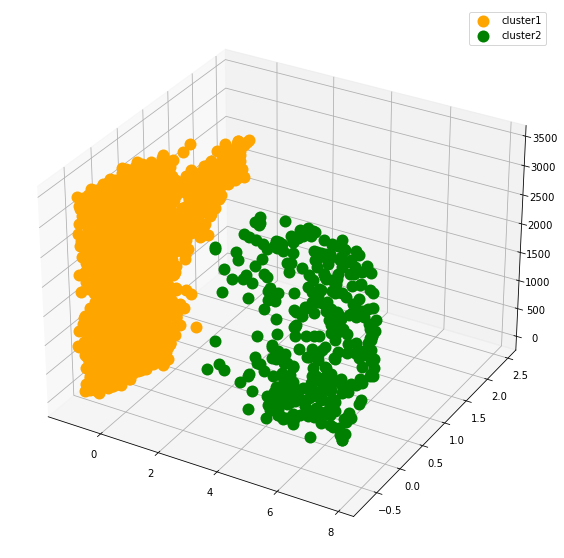

In [23]:
D = pd.DataFrame(dict(x=x, y=y, z=j.columns, label = clusters))
G = D.groupby("label")
plt.figure('KOS',figsize = (20,10))
axis = plt.axes(projection = '3d')
axis.margins(0.05)

for name,group in G:
    axis.plot(group.x,group.y,group.z, marker="o", linestyle="", ms=12, label= clusters_names[name], color = cluster_col[name], mec = 'none')
    axis.set_aspect('auto')
    axis.tick_params(\
                    axis = 'x',
                    which='both',
                    bottom = 'off',
                    top = 'off',
                    labelbottom = 'off')
    axis.tick_params(\
                    axis = 'y',
                    which='both',
                    bottom = 'off',
                    top = 'off',
                    labelbottom = 'off')
axis.legend(numpoints = 1)    
    
    

In [24]:
df=pd.read_csv('docwordenron.txt',skiprows=3,sep=' ',header=None)
df

FileNotFoundError: [Errno 2] No such file or directory: 'docwordenron.txt'

In [ ]:
worlen = len(df[1].unique())

In [ ]:
df.groupby('')


In [ ]:
g = df.groupby([1]).count()
g

In [ ]:
doclen = len(df[0].unique())
worlen = len(df[1].unique())
doclen

In [ ]:
df['Sum'] = df.sum(axis=1)
df

In [4]:
import pandas as pd
enron=pd.read_csv("docword.enron.txt",skiprows=3,sep=' ',header=None)

In [5]:
enron

,0,1,2
0,1,118,1
1,1,285,1
2,1,1229,1
3,1,1688,1
4,1,2068,1
...,...,...,...
3710415,39861,18448,1
3710416,39861,18848,1
3710417,39861,23449,1
3710418,39861,25721,1


In [ ]:
freq_word_count = {}
for i in freq_list:
  val = enron[enron['Freq']==i].count()
  freq_word_count[i] = val

In [ ]:
freq_list = enron['Freq'].unique()
freq_list[0]
enron[enron['Freq']==freq_list[0]].count()

freq_word_count = {}
for i in freq_list:
  val = enron[enron['Freq']==i].count()
  freq_word_count[i] = val


for key in freq_word_count.keys():
  if freq_word_count[key][0] > 50000:
    rand_sample = enron[enron['Freq']==key].sample(7*freq_word_count[key][0]//8)
    enron = enron.drop(rand_sample.index)